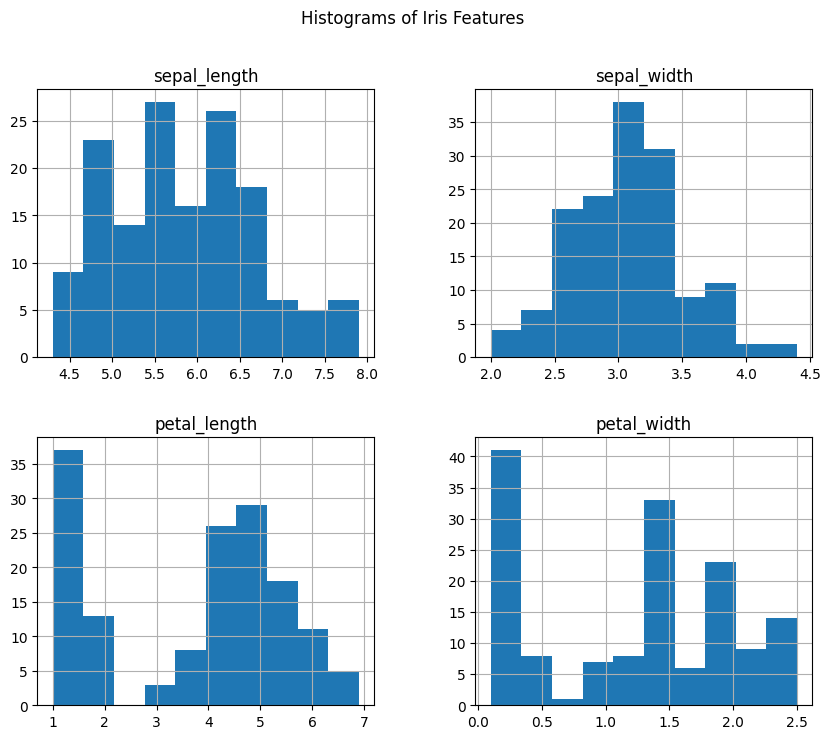

Correlation coefficients:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


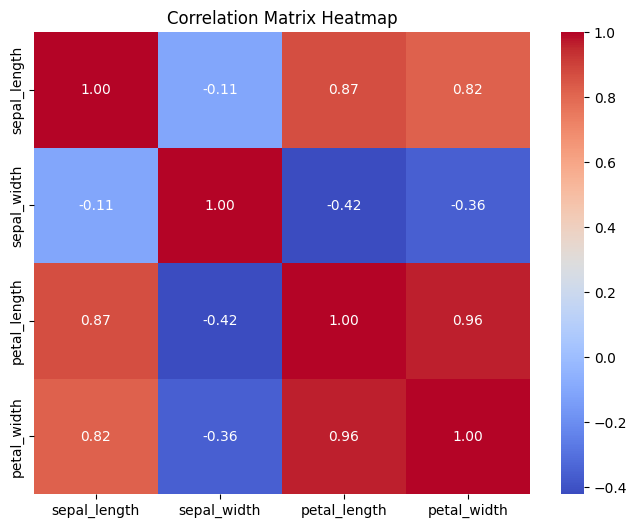

Shapes of training and testing subsets:
X_train shape: (135, 4)
X_test shape: (15, 4)
y_train shape: (135,)
y_test shape: (15,)
Learning Rate: 0.001
Coefficients: [-0.10719925 -0.0405839   0.24900758  0.53588614]
Intercept: 0.1537688309567522
RMSE: 0.24266437563703858
------------------------------
Learning Rate: 0.01
Coefficients: [-0.10719925 -0.0405839   0.24900758  0.53588614]
Intercept: 0.1537688309567522
RMSE: 0.24266437563703858
------------------------------
Learning Rate: 0.1
Coefficients: [-0.10719925 -0.0405839   0.24900758  0.53588614]
Intercept: 0.1537688309567522
RMSE: 0.24266437563703858
------------------------------


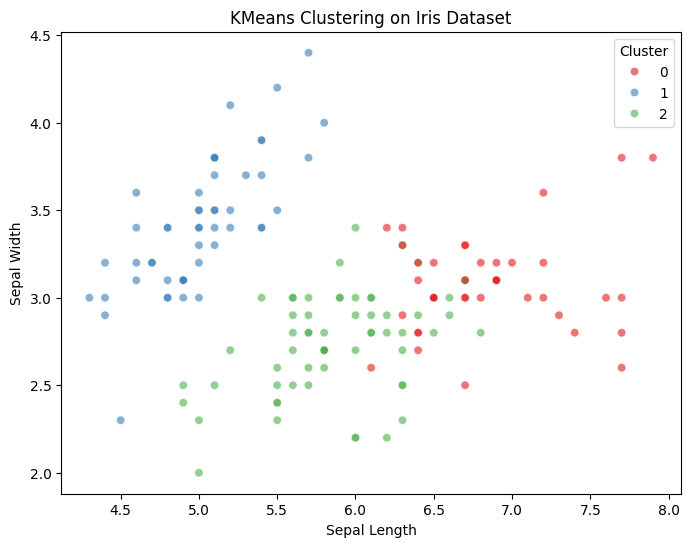

K-Means Clustering predictions for test set:
[0 0 0 2 0 0 0 2 0 0 0 2 0 0 2]


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Load the Iris dataset



       
data =pd.read_csv('C:\\Users\\ANIKET NAINWAL\\Downloads\\IrisFlowerDataset.csv')




# Since there are no missing values in the Iris dataset, we don't need to impute anything.

# Task 2: Plot histograms for all features
data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Iris Features')
plt.show()

# Tabulate the correlation coefficients
correlation = data.drop('species', axis=1).corr()
print("Correlation coefficients:")
print(correlation)

# Plot correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Task 3: Divide dataset into features and target
X = data.drop('species', axis=1)
y = data['species']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing subsets (90% train, 10% test, no shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

# Print shapes of training and testing subsets
print("Shapes of training and testing subsets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Task 4: Predict outcomes using regression algorithms with different learning rates
def perform_regression_with_learning_rate(X_train, y_train, X_test, y_test, learning_rate):
    # Linear Regression Model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Return the model coefficients, intercept, and RMSE
    return model.coef_, model.intercept_, rmse

 # Testing different learning rates (Though LinearRegression doesn't directly use learning rates, simulating comparison)
learning_rates = [0.001, 0.01, 0.1]
results = {}

for lr in learning_rates:
    coef, intercept, rmse = perform_regression_with_learning_rate(X_train, y_train, X_test, y_test, lr)
    results[lr] = {'coefficients': coef, 'intercept': intercept, 'rmse': rmse}

# Print results for different learning rates
for lr, result in results.items():
    print(f"Learning Rate: {lr}")
    print(f"Coefficients: {result['coefficients']}")
    print(f"Intercept: {result['intercept']}")
    print(f"RMSE: {result['rmse']}")
    print("-" * 30)

# Bonus Task: Clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Predicting the cluster for test data

data['cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='cluster', palette='Set1', alpha=0.6)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Cluster')
plt.show()
y_kmeans_pred = kmeans.predict(X_test)
print("K-Means Clustering predictions for test set:")
print(y_kmeans_pred)